<h1>Machine Learning Project 4 - SVM</h1>
<p>Joshua John and Liora Wachsstock</p>

We generated points using the random.randint() python library, which has a random uniform discrete distribution. We assigned a positive value to the point if it was above the y = x line, and a negative value if it was below it. If the data was to be non-linearly separable, then around 10% of the time we switched the point's value.

<h2> Useful Functions

<h4>Generate Data</h4>

In [1]:
import random
import time

random.seed(time.time())

def generate_data(size, linearly_separable=True, min_dist_btwn_points=0):
    data = [[0 for x in range(2)] for y in range(size)] 

    num_pos, num_neg = 0, 0
    
    for i in range(size):

        # Create random data point
        data[i][0] = random.randint(1,100)
        data[i][1] = random.randint(1,100)
        
        # Create optional distance between classes
        while(abs(data[i][0] - data[i][1]) <= min_dist_btwn_points):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)
            
        # Make sure there are equal amounts in each class
        while(num_pos >= (size / 2) and data[i][0] < data[i][1]):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100) 
        while(num_neg >= (size / 2) and data[i][0] >= data[i][1]):
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)
            
        # Point's position relative to x = y line determines value        
        if (data[i][0] < data[i][1]):
            data[i].append(1)
            num_pos += 1
        else:
            data[i].append(-1)
            num_neg += 1

        # Create non-linearly separable data by switching up the value 10% of the time
        # as long as a class is not full
        if (not linearly_separable and random.randint(1,10) % 10 == 0 and num_pos < (size / 2) and num_neg < (size / 2)):
            data[i][2] *= -1
            num_pos = num_pos + (1 if data[i][2] == 1 else -1)
            num_neg = num_neg + (1 if data[i][2] == -1 else -1)
            
    return data

<h4>Get the number of misclassifed points</h4>

In [2]:
import numpy as np
def num_missclassified_points(w, x, y):
    missed_points = []
    signs = np.sign(np.dot(x,w)) 
    for i in range(len(x)):
        if signs[i] != y[i]:
            missed_points.append(i)
    return len(missed_points)

<h4>Loss function</h4>

In [3]:
import numpy as np
def get_loss(W, x, y, C):
    return 1/2 * np.sum(W**2) + C * np.sum([np.max([0, 1 - y[i] * (np.dot(W,x[i]))]) for i in range(len(x))])

def lossGradient(W, x, y, C):
    lossGrad = np.zeros_like(W)
    distance = np.max([0, 1 - y * (np.dot(W,x))])
    
    if distance == 0:
        lossGrad = W
    else:
        lossGrad = W - np.multiply(np.multiply(x,y), C)
    
    return lossGrad

def svm_sgd(X, Y, W, N_steps, lr, C): 
    
    loss_over_time = []
    
    for step in range(N_steps):
        point = np.random.randint(len(X)) 
        W = W - (lr * lossGradient(W, X[point], Y[point], C))
        loss = get_loss(W,X,Y,C)
        
        loss_over_time.append(loss) #for plotting at the end
            
    return [W, 100, N_steps, loss_over_time]

<h4>Order Data Function</h4>

In [4]:
def order(data):
    ordered_data = []
    for i in range(len(data)):
        if data[i][2] > 0:
            ordered_data.append(data[i])
            
    for i in range(len(data)):
        if data[i][2] <= 0:
            ordered_data.append(data[i])
            
    return ordered_data

<h4>Separate Data</h4>

In [5]:
def sep_data(data):
    #separate the points from values
    values, points = [],[]
    for i in range(len(data)):
        values.append(data[i][2])
        points.append([1, data[i][0], data[i][1]])  #using a dummy variable 1 for x0 (ie use w*x_aug) instead of b + w*x
    
    return [points, values]

<h4>Plot and Print Data</h4>

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def accuracy(weights, data):
    points, values = sep_data(data)
    return (float(num_missclassified_points(weights, points, values)) / len(data)) * 100

def line_string(weights):
    return 'y = ('+ str(-weights[0]) + ' + ' + str(-weights[1]) + 'x)/' + str(weights[2])

def print_stats(train_ls, test_ls, weights, lr, final_weights, C, total_updates, iterations, train_accuracy, test_accuracy):
    print('1. We generated the points using the python library random.randint() for both x and y coordinates,')
    print('   which has a random uniform distribution. We then assigned a value based on the points position relative')
    print('   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.')
    print('    (https://docs.python.org/3/library/random.html)')
    print('2. Linearly separable training data :', train_ls)
    print('3. Linearly separable test data:', test_ls)
    print('4. Initial learning weights:', weights, ', learing rate:', lr, ', and C constant:', C)
    print('5.', line_string(final_weights))
    print('6. the margin width is:', 2 / np.sqrt(sum(w**2)))
    print('6. Final missclassification error on training data: ' + str(train_accuracy) + '%')
    print('   Final missclassification error on test data: '+ str(test_accuracy) + '%')
    print('8. Total times the weights were updated:', total_updates)
    print('9. Total iterations:', iterations)
    

def print_conclusions(base_case, case_I, case_II, case_III):
    print("Base case used w = [0,0,0], step_size constant = 1, and points were kept in their random order.")
    print("The resulting line was", line_string(base_case))
    print('')
    print("I. w = [1,2,3], step_size = 1, and the points were kept in their random order:") 
    print("   Resulting line:", line_string(case_I))
    print("   Compared to base case result:", line_string(base_case))
    print('')
    print("II. w = [0,0,0], step_size = 2, and the points were kept in their random order:") 
    print("   Resulting line:", line_string(case_II))
    print("   Compared to base case result:", line_string(base_case))
    print('')
    print("III. w = [0,0,0], step_size = 1, and the points were grouped according to class (PLA dealt with one and then the other):") 
    print("   Resulting line:", line_string(case_III))
    print("   Compared to base case result:", line_string(base_case))
    

def plot_data(data, graph_title, weights=[], margins = False):
    df = pd.DataFrame(data, columns=("X", "Y", "value"))
    df.plot.scatter(x="X", y="Y", c="value", cmap='viridis', title=graph_title)

    x = np.array(range(100))
    
    #actual classifying line
    y = ((-weights[0]) - weights[1]*x) / weights[2]
    plt.plot(x, y)
    
    if (margins):
        #top margin line
        y1 = (((-weights[0]) - (weights[1]*x) + 1) / weights[2])
        plt.plot(x, y1)
    
        #bottom margin line
        y2 = (((-weights[0]) - (weights[1]*x) - 1) / weights[2])
        plt.plot(x, y2)

<h3><u> Generate Test Data:</u></h3>

In [7]:
test_data = generate_data(30, linearly_separable=False)
test_points, test_values = sep_data(test_data)

<h2><u>Linearly Separable Data Set</u></h2>

<h3>Generate Training Data:

In [8]:
tr_data_ls = generate_data(50, min_dist_btwn_points=20)

#linearly seperable
tr_points, tr_values = sep_data(tr_data_ls)

<h4>Base case (w = [0,0,0], step_size = 1, ordered = false):

1. We generated the points using the python library random.randint() for both x and y coordinates,
   which has a random uniform distribution. We then assigned a value based on the points position relative
   to the y = x line. For non-linearly separable data, we flipped the value 10% of the time.
    (https://docs.python.org/3/library/random.html)
2. Linearly separable training data : True
3. Linearly separable test data: False
4. Initial learning weights: [0, 0, 0] , learing rate: 0.0005 , and C constant: 1
5. y = (0.0004789847748818805 + 0.10470368322357694x)/0.09718092717600742
6. the margin width is: 14.000322414508622
6. Final missclassification error on training data: 0.0%
   Final missclassification error on test data: 10.0%
8. Total times the weights were updated: 100
9. Total iterations: 400


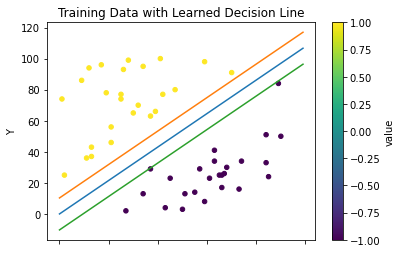

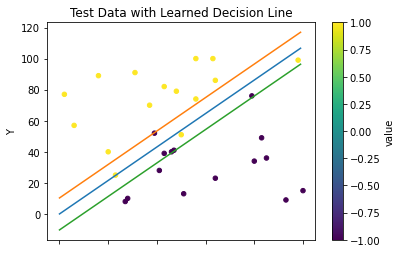

In [9]:
#Variables
steps = 400
learning_rate = 0.0005
C = 1;
w = [0,0,0]

#Run SVM Algorithm on training Data
w, updates, iterations, loss_array = svm_sgd(tr_points, tr_values, w, steps, learning_rate, C)

plot_data(tr_data_ls, 'Training Data with Learned Decision Line and Margins', w, margins = True)
plot_data(test_data, 'Test Data with Learned Decision Line', w)
print_stats(True, False, [0,0,0], learning_rate, w, C, updates, iterations, accuracy(w, tr_data_ls), accuracy(w, test_data))

#save result
base_case = w

Text(0.5, 1.0, 'Loss over Iterations')

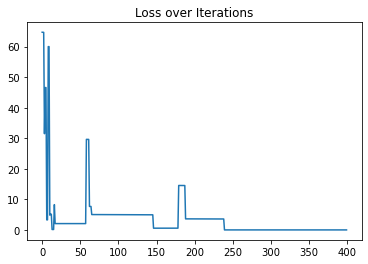

In [10]:
x = np.array(range(len(loss_array)))
plt.plot(x, loss_array)
plt.title("Loss over Iterations")